In [1]:
# Import local libraries
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import os

# High Level Features

In [34]:
# my_data_file_path = './High_Level_Features/higgs_highlevelfeatures_test.csv'
my_data_file_path = './BDT_Model_for_test/Data_train.csv'
# # read the data and store data in DataFrame
my_data = pd.read_csv(my_data_file_path)

pre_2CNN = np.load("./2CNN_Model_for_test/2CNN_pre.npy")
pre_GBDT = np.load("./BDT_Model_for_test/GBDT_pre.npy")

my_data["PTH"],my_data["evtweight"] = my_data["higgs_pt"],my_data["weight"]
my_data["pre_GBDT_out1"],my_data["pre_GBDT_out2"] = pre_GBDT[:,0], pre_GBDT[:,1]
my_data["pre_GBDT_out3"],my_data["pre_GBDT_out4"] = pre_GBDT[:,2], pre_GBDT[:,3]

my_data["pre_2CNN_out1"],my_data["pre_2CNN_out2"] = pre_2CNN[:,0], pre_2CNN[:,1]
my_data["pre_2CNN_out3"],my_data["pre_2CNN_out4"] = pre_2CNN[:,2], pre_2CNN[:,3]

totallist = ["higgs_pt","higgs_eta","higgs_m",
           "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
          # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
           "girth","CIJS","SIJS","DeltaEta",
           "weight","isGGH","isVBF","isVH","isttH","eventindex"]

# my_data = my_data[my_data["higgs_pt"] > 800]

ggH = my_data[my_data["isGGH"]==1]
VBF = my_data[my_data["isVBF"]==1]
VH = my_data[my_data["isVH"]==1]
ttH = my_data[my_data["isttH"]==1]
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("#",len(ggH),len(VBF),len(VH),len(ttH)))


          ggH     VBF      VH     ttH   
   #     229000  229000  229000  229000 


In [91]:
cut = 0
axis = "pre_2CNN_out4"
ggH = my_data[(my_data["isGGH"]==1) & (my_data[axis]>=cut) ]
VBF = my_data[(my_data["isVBF"]==1) & (my_data[axis]>=cut) ]
VH =  my_data[(my_data["isVH"]==1) & (my_data[axis]>=cut) ]
ttH = my_data[(my_data["isttH"]==1) & (my_data[axis]>=cut) ]
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("#",len(ggH),len(VBF),len(VH),len(ttH)))

          ggH     VBF      VH     ttH   
   #     229000  229000  229000  229000 


In [92]:
title = ["ggF", "VBF", "VH", "ttH", "WH", "ZH"]
Higgs_PT = [ggH["higgs_pt"], VBF["higgs_pt"], VH["higgs_pt"], ttH["higgs_pt"]]#, wh_higgs_pt, zh_higgs_pt]
Higgs_m = [ggH["higgs_m"], VBF["higgs_m"], VH["higgs_m"], ttH["higgs_m"]]#, wh_higgs_mass, zh_higgs_mass]
Higgs_eta = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_higgs_eta, zh_higgs_eta]
non_Higgs_PT = [ggH["non_higgs_leading_pt"], VBF["non_higgs_leading_pt"], VH["non_higgs_leading_pt"], ttH["non_higgs_leading_pt"]]#, wh_non_higgs_leading_pt, zh_non_higgs_leading_pt]
non_Higgs_m = [ggH["non_higgs_leading_m"], VBF["non_higgs_leading_m"], VH["non_higgs_leading_m"], ttH["non_higgs_leading_m"]]#, wh_non_higgs_leading_m, zh_non_higgs_leading_m]
non_Higgs_eta = [ggH["non_higgs_leading_eta"], VBF["non_higgs_leading_eta"], VH["non_higgs_leading_eta"], ttH["non_higgs_leading_eta"]]#, wh_non_higgs_leading_eta, zh_non_higgs_leading_eta]
# non_Higgs_subleading_PT = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_non_higgs_subleading_pt, zh_non_higgs_subleading_pt]
# non_Higgs_subleading_m = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_non_higgs_subleading_m, zh_non_higgs_subleading_m]
# non_Higgs_subleading_eta = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_non_higgs_subleading_eta, zh_non_higgs_subleading_eta]
# n_jet = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, n_wh, n_zh]
GIRTH = [ggH["girth"], VBF["girth"], VH["girth"], ttH["girth"]]
C_I_J_S = [ggH["CIJS"], VBF["CIJS"], VH["CIJS"], ttH["CIJS"]]
S_I_J_S = [ggH["SIJS"], VBF["SIJS"], VH["SIJS"], ttH["SIJS"]]
DeltaEta = [ggH["DeltaEta"], VBF["DeltaEta"], VH["DeltaEta"], ttH["DeltaEta"]]

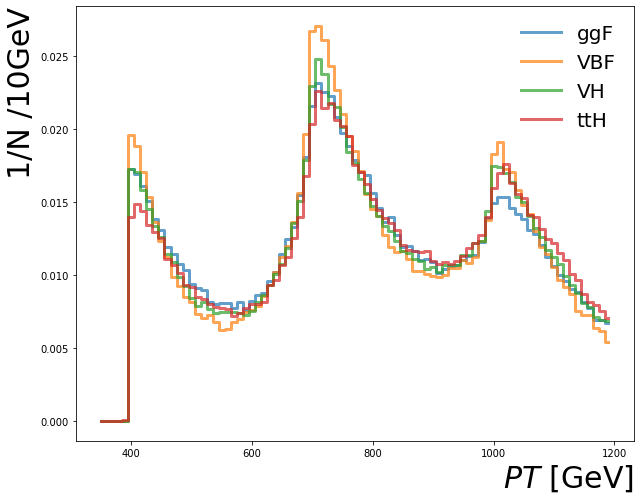

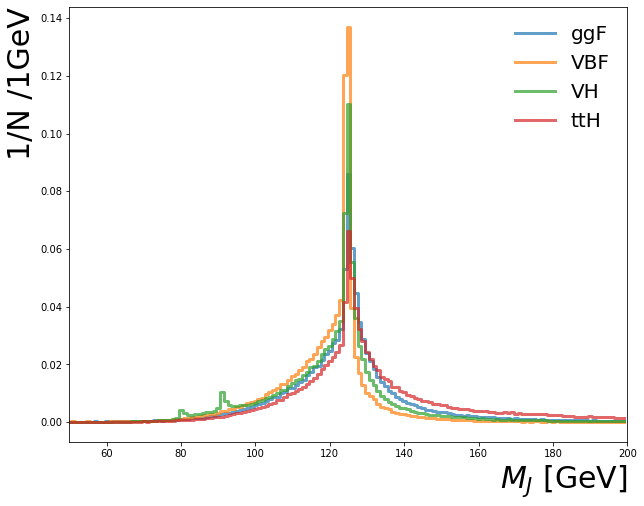

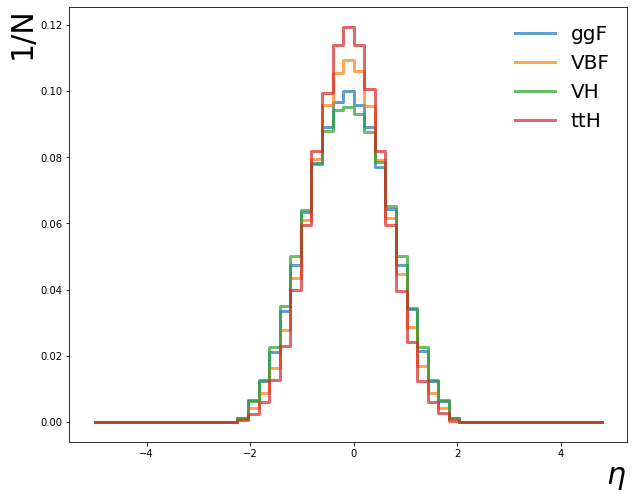

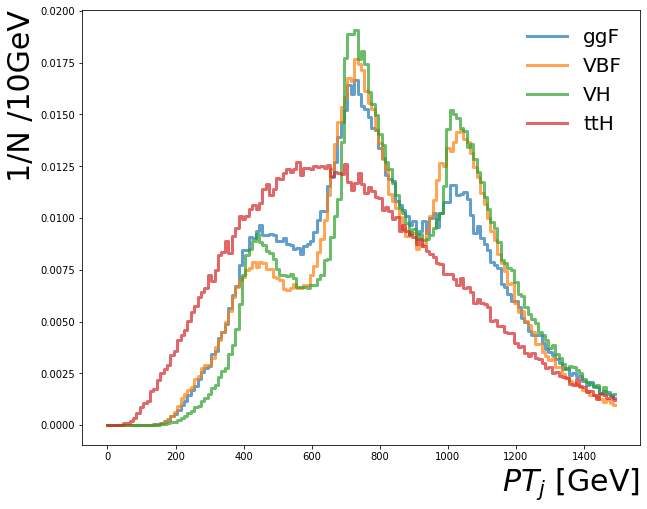

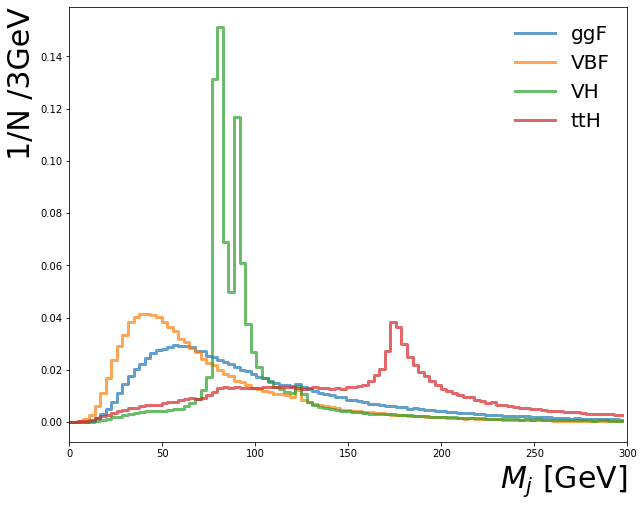

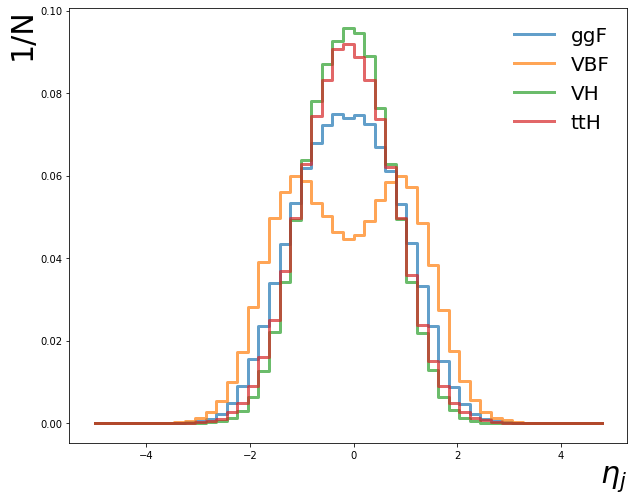

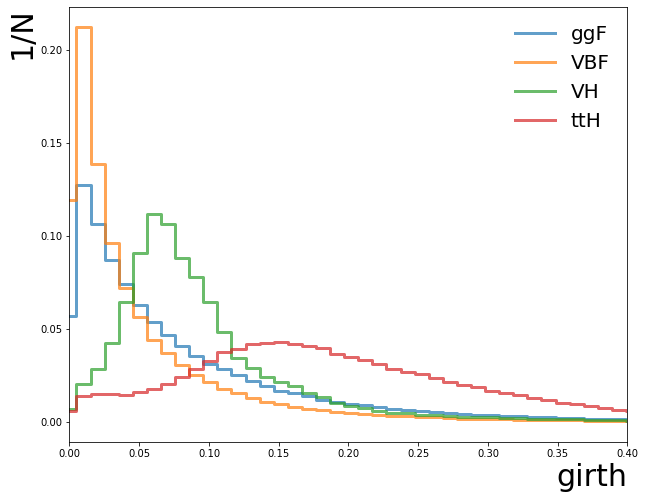

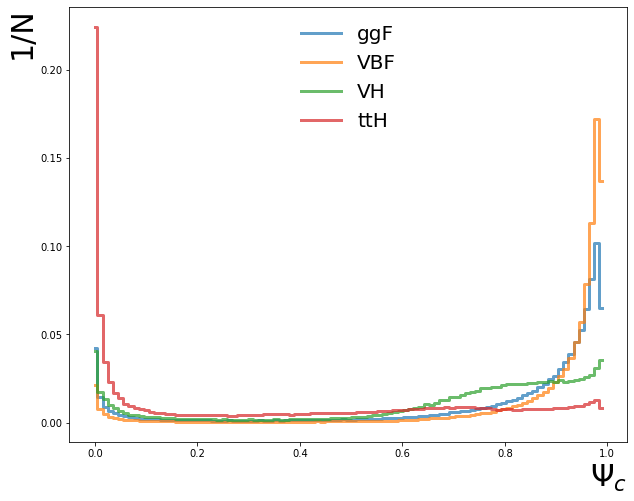

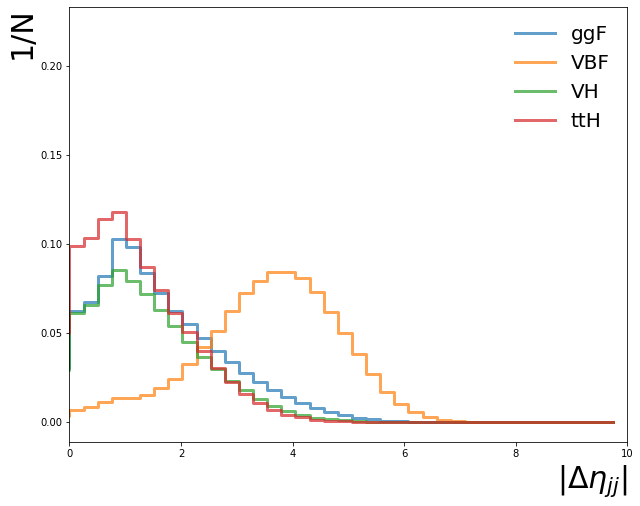

In [93]:
BDT_cut = ""#
def HIST(process, length, title):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), where='mid',linewidth=3, alpha=0.7, label=title[i])
    plt.legend(ncol=1,fontsize=20, edgecolor = "w")

fig = plt.figure(figsize=(10,8))
for i, process in enumerate(Higgs_PT):
    length = np.linspace(350,1200,86)
    HIST(process, length, title)
#     plt.title("Higgs Jet PT", fontsize = 25)
    plt.xlabel("$PT$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
plt.ylabel("1/N /10GeV",fontsize=30,horizontalalignment='right',y=1)   
plt.savefig("./Higgs_Pt/higgs_j_pt"+str(BDT_cut)+".pdf")


fig = plt.figure(figsize=(10,8))

for i, process in enumerate(Higgs_m):
    length = np.linspace(0,200,201)
    HIST(process, length, title)
#     plt.title("Higgs Jet Mass", fontsize = 25)
    plt.xlabel("$M_J$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
plt.xlim((50,200))
plt.ylabel("1/N /1GeV",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
plt.savefig("./Higgs_Pt/higgs_j_m"+str(BDT_cut)+".pdf")

fig = plt.figure(figsize=(10,8))
for i, process in enumerate(Higgs_eta):
    length = np.linspace(-5,5,50)
    HIST(process, length, title)
#     plt.title("Higgs Jet $\eta$", fontsize = 25)
    plt.xlabel("$\eta$ ", fontsize=30,horizontalalignment='right',x=1) 
    
plt.ylabel("1/N",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
plt.savefig("./Higgs_Pt/higgs_j_eta"+str(BDT_cut)+".pdf")

fig = plt.figure(figsize=(10,8))
for i, process in enumerate(non_Higgs_PT):
    length = np.linspace(0,1500,151)
    HIST(process, length, title)
#     plt.title("non-Higgs Leading Jet PT", fontsize = 25)
    plt.xlabel("$PT_j$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
plt.ylabel("1/N /10GeV",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
plt.savefig("./Higgs_Pt/non_higgs_j_pt"+str(BDT_cut)+".pdf")

fig = plt.figure(figsize=(10,8))

for i, process in enumerate(non_Higgs_m):
    length = np.linspace(0,300,101)
    HIST(process, length, title)
#     plt.title("non-Higgs Leading Jet Mass", fontsize = 25)
    plt.xlabel("$M_j$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 

plt.xlim((0,300))
plt.ylabel("1/N /3GeV",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
plt.savefig("./Higgs_Pt/non_higgs_j_m"+str(BDT_cut)+".pdf")

fig = plt.figure(figsize=(10,8))
for i, process in enumerate(non_Higgs_eta):
    length = np.linspace(-5,5,50)
    HIST(process, length, title)
#     plt.title("non-Higgs Leading Jet $\eta$", fontsize = 25)
    plt.xlabel("$\eta_j$ ", fontsize=30,horizontalalignment='right',x=1) 
    
plt.ylabel("1/N",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
plt.savefig("./Higgs_Pt/non_higgs_j_eta"+str(BDT_cut)+".pdf")

fig = plt.figure(figsize=(10,8))
for i, process in enumerate(GIRTH):
    length = np.linspace(0,1,100)
    HIST(process, length, title)
#     plt.title("non-Higgs Leading Jet $\eta$", fontsize = 25)
    plt.xlabel("girth", fontsize=30,horizontalalignment='right',x=1) 
    plt.xlim((0,0.4))
plt.ylabel("1/N",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
plt.savefig("./Higgs_Pt/girth"+str(BDT_cut)+".pdf")


fig = plt.figure(figsize=(10,8))
for i, process in enumerate(C_I_J_S):
    length = np.linspace(0,1,100)
    HIST(process, length, title)
#     plt.title("non-Higgs Leading Jet $\eta$", fontsize = 25)
    plt.xlabel("$\Psi_c$", fontsize=30,horizontalalignment='right',x=1) 
plt.ylabel("1/N",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
plt.savefig("./Higgs_Pt/Psi_c"+str(BDT_cut)+".pdf")



fig = plt.figure(figsize=(10,8))
for i, process in enumerate(DeltaEta):
    length = np.linspace(-10,10,80)
    HIST(process, length, title)
    plt.xlabel("$|\Delta\eta_{jj}|$", fontsize=30,horizontalalignment='right',x=1) 
    
plt.xlim((0,10)) 
# plt.ylim((0,0.12)) 
plt.ylabel("1/N",fontsize=30,horizontalalignment='right',y=1)   
plt.savefig("./Higgs_Pt/delta_eta_eta"+str(BDT_cut)+".pdf")
plt.show()


# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(n_jet):
#     plt.hist(process, 100, range=(0,100), facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("# of non-Higgs Jet", fontsize = 25)
#     plt.xlabel("", fontsize=30,horizontalalignment='right',x=1) 
    
# # plt.xlim((0,30))
# plt.ylabel("#",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# plt.savefig("./Higgs_Pt/N_non_higgs_j")


# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(non_Higgs_subleading_PT):
#     length = np.linspace(0,1500,300)
#     hist, bins = np.histogram(process, bins=length)
#     plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), where='mid',linewidth=2, alpha=0.7, label=title[i])
# #     plt.hist(process, 100, facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("non-Higgs sub-Leading Jet PT", fontsize = 25)
#     plt.xlabel("$PT$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.ylabel("1/N /5GeV",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# # plt.savefig("./non_higgs_subleading_j_pt")

# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(non_Higgs_subleading_m):
#     length = np.linspace(0,300,150)
#     hist, bins = np.histogram(process, bins=length)
#     plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), where='mid',linewidth=2, alpha=0.7, label=title[i])
# #     plt.hist(process, 100, facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("non-Higgs sub-Leading Jet Mass", fontsize = 25)
#     plt.xlabel("$M_J$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 

# plt.xlim((0,200))
# plt.ylabel("1/N /2GeV",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# plt.savefig("./Higgs_Pt/non_higgs_subleading_j_m")


    
# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(non_Higgs_subleading_eta):
#     length = np.linspace(-5,5,50)
#     hist, bins = np.histogram(process, bins=length)
#     plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), where='mid',linewidth=2, alpha=0.7, label=title[i])
# #     plt.hist(process, 100, facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("non-Higgs sub-Leading Jet $\eta$", fontsize = 25)
#     plt.xlabel("$\eta$ ", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.ylabel("1/N",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# plt.savefig("./Higgs_Pt/non_higgs_subleading_j_eta")




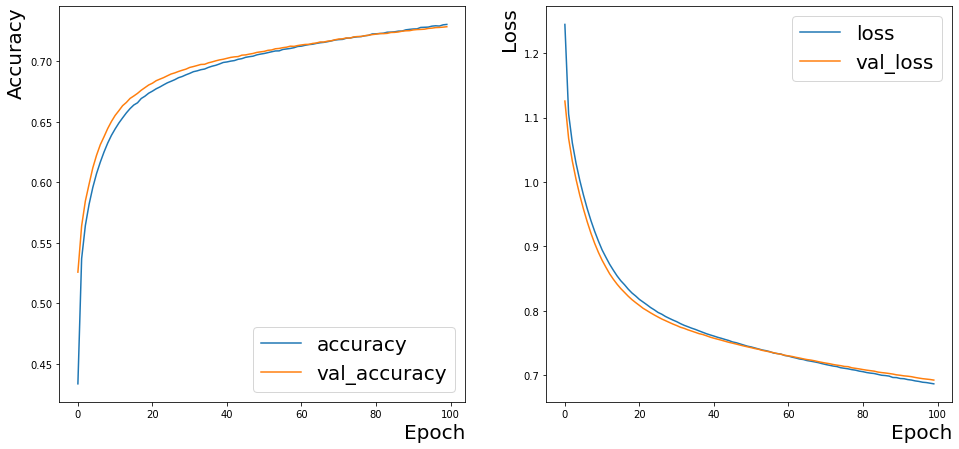

In [134]:
training_log = pd.read_csv("./2CNN_Model_for_train/training_log.csv")
# training_log = pd.concat([training_log_0,training_log_1],ignore_index=True,axis=0,join='inner')

plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
plt.plot(training_log['accuracy'], label='accuracy')
plt.plot(training_log['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch', fontsize=20, horizontalalignment='right',x=1)
plt.ylabel('Accuracy', fontsize=20, horizontalalignment='right',y=1)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right',fontsize=20)

plt.subplot(2,2,2)
plt.plot(training_log['loss'], label='loss')
plt.plot(training_log['val_loss'], label = 'val_loss')
plt.xlabel('Epoch', fontsize=20, horizontalalignment='right',x=1)
plt.ylabel('Loss', fontsize=20, horizontalalignment='right',y=1)
# plt.ylim([0.5, 1])
plt.legend(fontsize=20)#,loc='lower right')

plt.savefig("./Higgs_Pt/learning_curve.pdf", transparent=True)

plt.show()

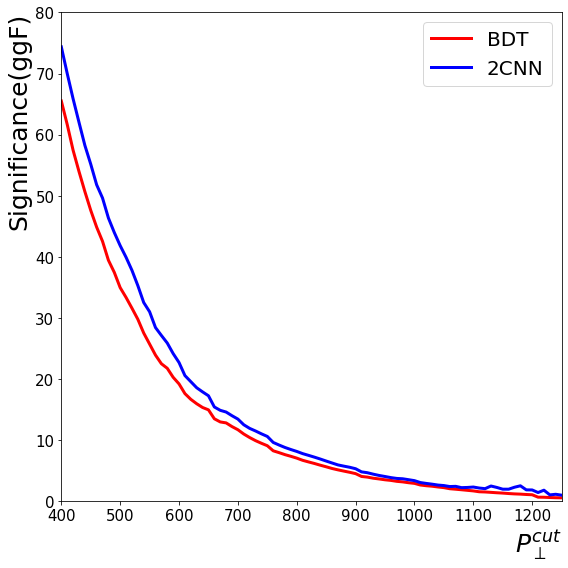

In [8]:
significance_BDT = np.load("./BDT_Model_for_test/significancescan.npy")
significance_2CNN = np.load("./2CNN_Model_for_test/significancescan.npy")
length = len(significance_BDT)-1
PTCUT = np.linspace(400,int(length*10+400),int(length+1))


# fig, ax = plt.subplots(1,1, figsize=(9,6))
fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.plot(PTCUT,significance_BDT,"r-",linewidth = 3,label="BDT ")
plt.plot(PTCUT,significance_2CNN,"b-",linewidth = 3,label="2CNN")
# ax.axvline(cut_opt , linewidth = 1, linestyle = "-", color = "red")
# ax.axhline(max_sig , linewidth = 1, linestyle = "-", color = "red")

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.xlabel("$P^{cut}_{\perp}$", fontsize=25,horizontalalignment='right',x=1)
plt.ylabel("Significance(ggF)", fontsize=25,horizontalalignment='right',y=1)

plt.xlim((400,1250))
plt.ylim((0,80))
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=20)
plt.savefig("./Higgs_Pt/sig_scan.pdf", transparent=True)
plt.tight_layout()
plt.show()

In [3]:
features = [#"higgs_pt","higgs_eta","higgs_m",
#        "non_higgs_leading_pt",
        "non_higgs_leading_eta","non_higgs_leading_m",
      # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
       "girth","CIJS","SIJS","DeltaEta"
            ]
path_train = "./BDT_Model/"
path_test = "./BDT_Model_for_test/"
Data_train = pd.read_csv(path_train + "Data_train.csv")
Data_test = pd.read_csv(path_test + "Data_train.csv")


pre_2CNN = np.load("./2CNN_Model_for_test/2CNN_pre.npy")
pre_GBDT = np.load("./BDT_Model_for_test/GBDT_pre.npy")

Data_train["PTH"],Data_train["evtweight"] = Data_train["higgs_pt"],Data_train["weight"]
Data_test["PTH"],Data_test["evtweight"] = Data_test["higgs_pt"],Data_test["weight"]
Data_test["pre_GBDT_out1"],Data_test["pre_GBDT_out2"] = pre_GBDT[:,0], pre_GBDT[:,1]
Data_test["pre_GBDT_out3"],Data_test["pre_GBDT_out4"] = pre_GBDT[:,2], pre_GBDT[:,3]

Data_test["pre_2CNN_out1"],Data_test["pre_2CNN_out2"] = pre_2CNN[:,0], pre_2CNN[:,1]
Data_test["pre_2CNN_out3"],Data_test["pre_2CNN_out4"] = pre_2CNN[:,2], pre_2CNN[:,3]


# Data_train = Data_train[Data_train["higgs_pt"] > 800]
# Data_test = Data_test[Data_test["higgs_pt"] > 800]

ggH_train = Data_train[Data_train["isGGH"]==1]
ggH_test = Data_test[Data_test["isGGH"]==1]

VBF_train = Data_train[Data_train["isVBF"]==1]
VBF_test = Data_test[Data_test["isVBF"]==1]

VH_train = Data_train[Data_train["isVH"]==1]
VH_test = Data_test[Data_test["isVH"]==1]

ttH_train = Data_train[Data_train["isttH"]==1]
ttH_test = Data_test[Data_test["isttH"]==1]

productions = [ggH_test,VBF_test,VH_test,ttH_test]

print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train),len(VH_train),len(ttH_train)))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test),len(VH_test),len(ttH_test)))

          ggH     VBF      VH     ttH   
Train #  170000  170000  170000  170000 
 Test #  229000  229000  229000  229000 


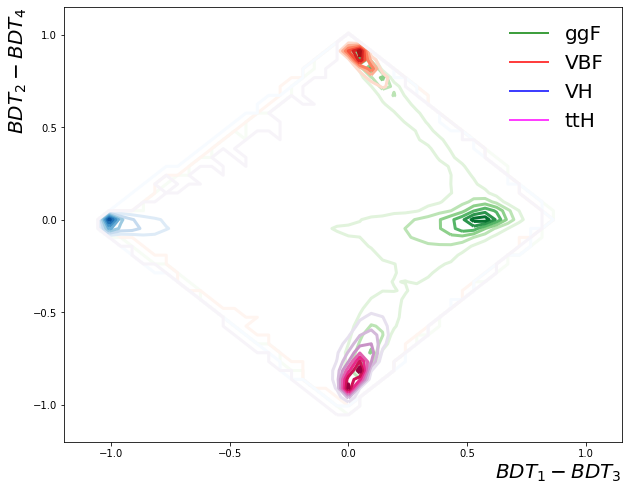

In [133]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

title = ["ggF", "VBF", "VH", "ttH"]
COLOR = ["green","red","blue","magenta"]
CMAP = ["Greens","Reds","Blues","PuRd"]

for i, element in enumerate(productions):
    xbin = np.linspace(-1.2,1.2,51)
    hist2D, binx, biny = np.histogram2d(element["pre_GBDT_out1"]-element["pre_GBDT_out3"],
                                        element["pre_GBDT_out2"]-element["pre_GBDT_out4"],
                                        bins = xbin)
    plt.contour(binx[:-1],biny[:-1], hist2D.T,cmap=CMAP[i],linewidths=3) #
    plt.hlines(0.9, 0.8, 0.8, color=COLOR[i],label=title[i])

# plt.xlim(0,10)
plt.xlabel("$BDT_1-BDT_3$", fontsize=20,horizontalalignment='right',x=1)
plt.ylabel("$BDT_2-BDT_4$",fontsize=20,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=20,frameon=False)
plt.savefig("./Higgs_Pt/visualization_GBDT.pdf", transparent=True)
plt.show()

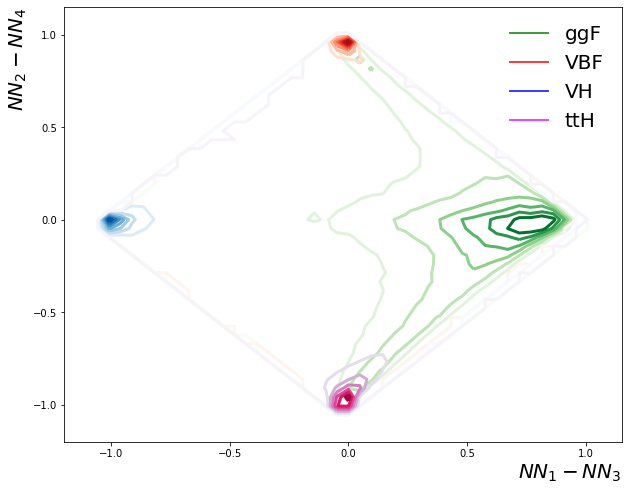

In [131]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

title = ["ggF", "VBF", "VH", "ttH"]
COLOR = ["green","red","blue","magenta"]
CMAP = ["Greens","Reds","Blues","PuRd"]

for i, element in enumerate(productions):
    xbin = np.linspace(-1.2,1.2,51)
    hist2D, binx, biny = np.histogram2d(element["pre_2CNN_out1"]-element["pre_2CNN_out3"],
                                        element["pre_2CNN_out2"]-element["pre_2CNN_out4"],
                                        bins = xbin)
    plt.contour(binx[:-1],biny[:-1], hist2D.T,cmap=CMAP[i],linewidths=3) #
    plt.hlines(0.9, 0.8, 0.8, color=COLOR[i],label=title[i])

# plt.xlim(0,10)
plt.xlabel("$NN_1-NN_3$", fontsize=20,horizontalalignment='right',x=1)
plt.ylabel("$NN_2-NN_4$",fontsize=20,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=20,frameon=False)
plt.savefig("./Higgs_Pt/visualization_2CNN.pdf", transparent=True)
plt.show()

# Images

In [6]:
my_images_file_path = './2CNN_Model_for_test/Test_dict.csv'
# # read the data and store data in DataFrame
my_images = pd.read_csv(my_images_file_path)
pre_2CNN = np.load("./2CNN_Model_for_test/2CNN_pre.npy")
my_images["PTH"] = Data_test["PTH"]
my_images["pre_2CNN_out1"],my_images["pre_2CNN_out2"] = pre_2CNN[:,0], pre_2CNN[:,1]
my_images["pre_2CNN_out3"],my_images["pre_2CNN_out4"] = pre_2CNN[:,2], pre_2CNN[:,3]

In [7]:
ggh_path = my_images[ (my_images["Y"]==0) & (my_images["pre_2CNN_out1"] >= 0.9)]
vbf_path = my_images[ (my_images["Y"]==1) & (my_images["pre_2CNN_out2"] >= 0.9)]
vh_path = my_images[ (my_images["Y"]==2) & (my_images["pre_2CNN_out3"] >= 0.9)]
tth_path = my_images[ (my_images["Y"]==3) & (my_images["pre_2CNN_out4"] >= 0.9)]

production_path = [ggh_path,vbf_path,vh_path,tth_path]
EVENT, JET = [], []
print(min(len(ggh_path),len(vbf_path),len(vh_path),len(tth_path)))


N = 4000
for i , element in enumerate(production_path): 
    event_filepaths = element["EventImageTest"]
    jet_filepaths = element["JetImageTest"]
    eventimage, jetimage = np.zeros((3,40,40)), np.zeros((3,40,40))
    k = 1
    for j , subelement in enumerate(event_filepaths):
        if k <= N:
            eventimage += np.load("./2CNN_Model_for_test/" + subelement)['arr_0']
            k += 1
        else:
            break
    k = 1 
    for j , subelement in enumerate(jet_filepaths):
        if k <= N:
            jetimage += np.load("./2CNN_Model_for_test/" + subelement)['arr_0']
            k += 1
        else:
            break
    eventimage = eventimage/N
    jetimage = jetimage/N
    EVENT.append(eventimage)
    JET.append(jetimage)
    

4513


ggF event image:


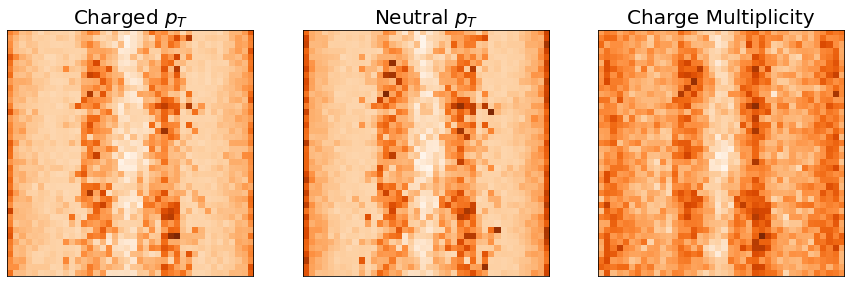

VBF event image:


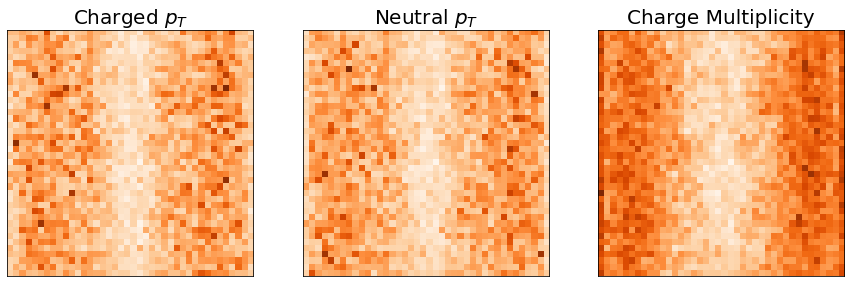

VH event image:


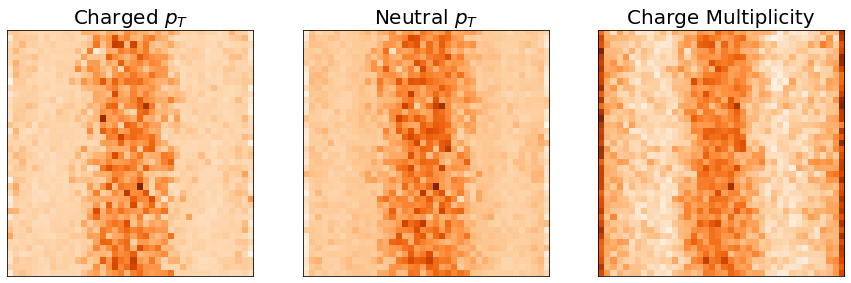

ttH event image:


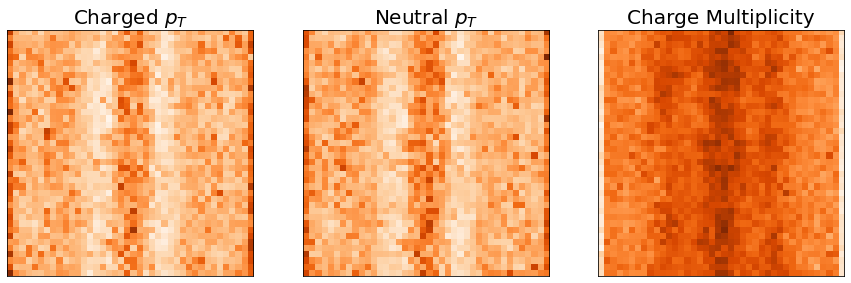

In [9]:
# Event image
name_list = ["ggF","VBF","VH","ttH"]
figtitle = ["Charged $p_T$", "Neutral $p_T$", "Charge Multiplicity"]
for i, element in enumerate(name_list): 
    print( element + ' event image:')
    fig, ax = plt.subplots(1,1, figsize=(15,5))

    for j in range(1,4):
        plt.subplot(1,3,j)
        plt.imshow(EVENT[i][j-1],cmap="Oranges")
        plt.tick_params(labelbottom=False,labelleft=False,bottom=0,left=0) 
        plt.title(figtitle[j-1],fontsize=20)
#         cb = plt.colorbar()
#         cb.ax.tick_params(labelsize=10)
    plt.savefig("./Higgs_Pt/event_image_"+str(name_list[i])+".pdf", transparent=True)
    plt.show()

ggF jet image:


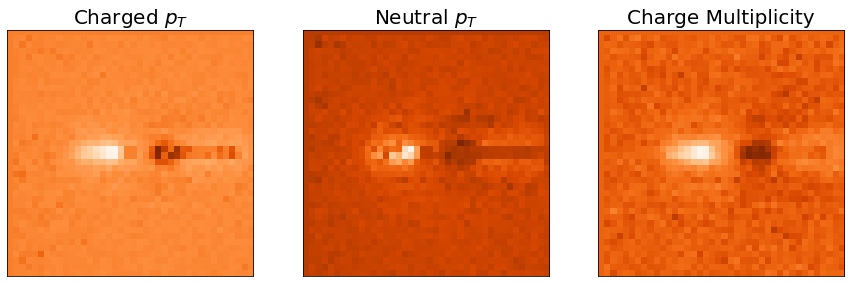

VBF jet image:


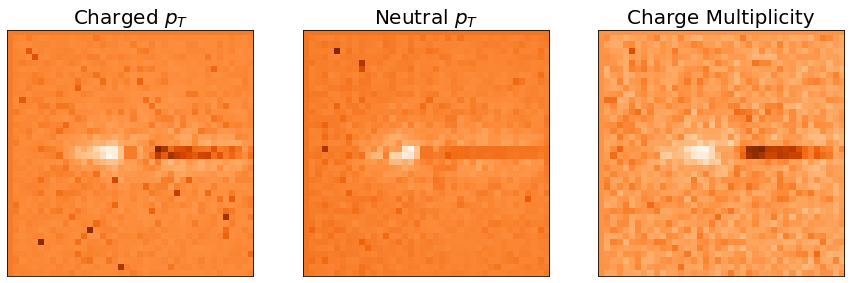

VH jet image:


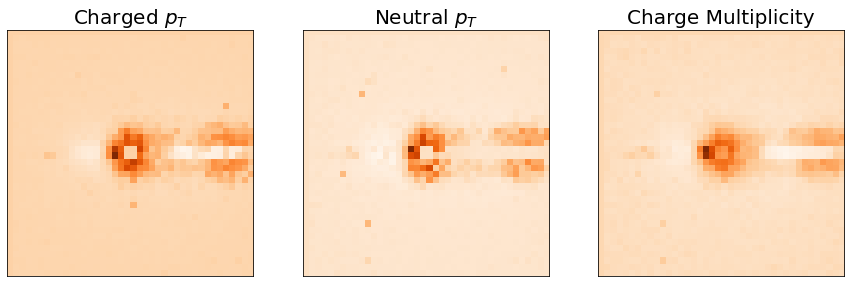

ttH jet image:


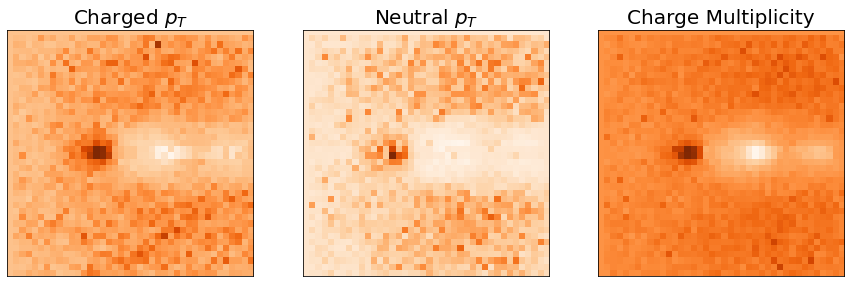

In [10]:
# Jet image
name_list = ["ggF","VBF","VH","ttH"]
figtitle = ["Charged $p_T$", "Neutral $p_T$", "Charge Multiplicity"]
for i, element in enumerate(name_list): 
    print( element + ' jet image:')
    plt.figure(figsize=(15,5))

    for j in range(1,4):
        plt.subplot(1,3,j)
        plt.imshow(JET[i][j-1],cmap="Oranges")
        plt.tick_params(labelbottom=False,labelleft=False,bottom=0,left=0) 
        plt.title(figtitle[j-1],fontsize=20)
#         cb = plt.colorbar()
        # cb.ax.tick_params(labelsize=10)
    plt.savefig("./Higgs_Pt/jet_image_"+str(name_list[i])+".pdf", transparent=True)
    plt.show()
    

# 600 $>$ $P^H_T$  $>$ 400 GeV

In [11]:
ggh_path = my_images[ (my_images["Y"]==0) & (my_images["PTH"] >= 400) & (my_images["PTH"] <= 600)]
vbf_path = my_images[ (my_images["Y"]==1) & (my_images["PTH"] >= 400) & (my_images["PTH"] <= 600)]
vh_path = my_images[ (my_images["Y"]==2) & (my_images["PTH"] >= 400) & (my_images["PTH"] <= 600)]
tth_path = my_images[ (my_images["Y"]==3) & (my_images["PTH"] >= 400) & (my_images["PTH"] <= 600)]

production_path = [ggh_path,vbf_path,vh_path,tth_path]
EVENT, JET = [], []
print(min(len(ggh_path),len(vbf_path),len(vh_path),len(tth_path)))


N = 4000
for i , element in enumerate(production_path): 
    event_filepaths = element["EventImageTest"]
    jet_filepaths = element["JetImageTest"]
    eventimage, jetimage = np.zeros((3,40,40)), np.zeros((3,40,40))
    k = 1
    for j , subelement in enumerate(event_filepaths):
        if k <= N:
            eventimage += np.load("./2CNN_Model_for_test/" + subelement)['arr_0']
            k += 1
        else:
            break
    k = 1 
    for j , subelement in enumerate(jet_filepaths):
        if k <= N:
            jetimage += np.load("./2CNN_Model_for_test/" + subelement)['arr_0']
            k += 1
        else:
            break
    eventimage = eventimage/N
    jetimage = jetimage/N
    EVENT.append(eventimage)
    JET.append(jetimage)
    

41592


ggF event image:


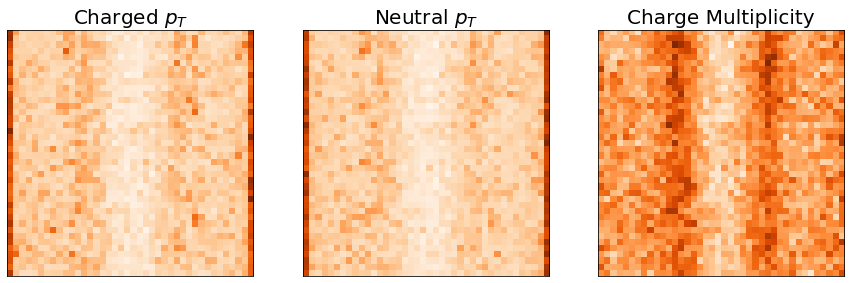

VBF event image:


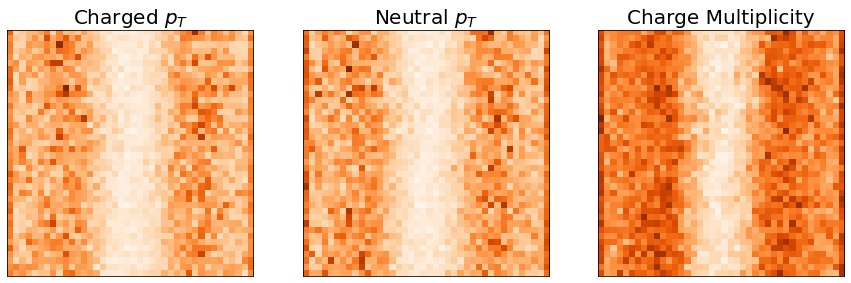

VH event image:


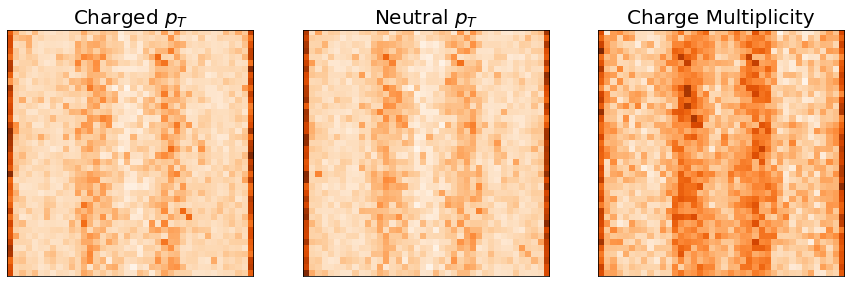

ttH event image:


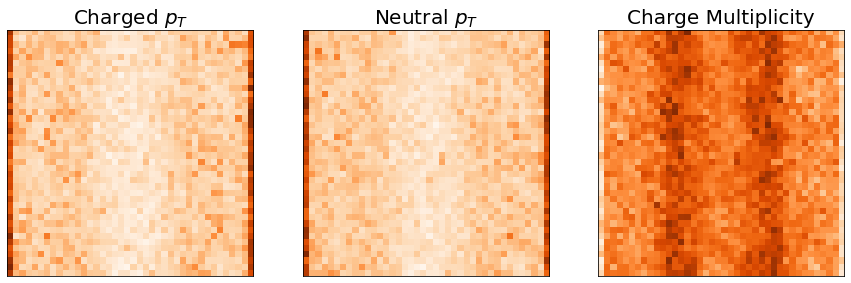

In [12]:
# Event image
name_list = ["ggF","VBF","VH","ttH"]
figtitle = ["Charged $p_T$", "Neutral $p_T$", "Charge Multiplicity"]
for i, element in enumerate(name_list): 
    print( element + ' event image:')
    fig, ax = plt.subplots(1,1, figsize=(15,5))

    for j in range(1,4):
        plt.subplot(1,3,j)
        plt.imshow(EVENT[i][j-1],cmap="Oranges")
        plt.tick_params(labelbottom=False,labelleft=False,bottom=0,left=0) 
        plt.title(figtitle[j-1],fontsize=20)
#         cb = plt.colorbar()
#         cb.ax.tick_params(labelsize=10)
    plt.savefig("./Higgs_Pt/event_image_"+str(name_list[i])+"_400600.pdf", transparent=True)
    plt.show()

ggF jet image:


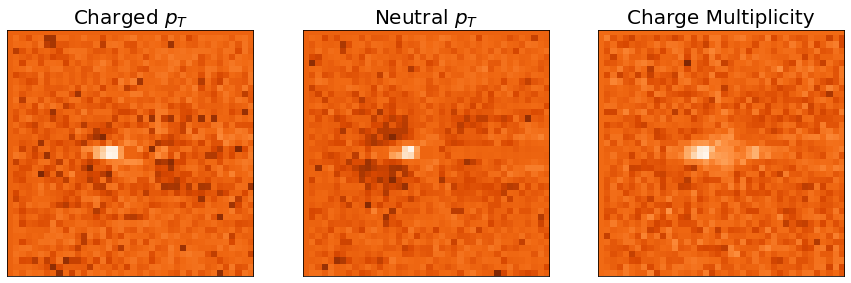

VBF jet image:


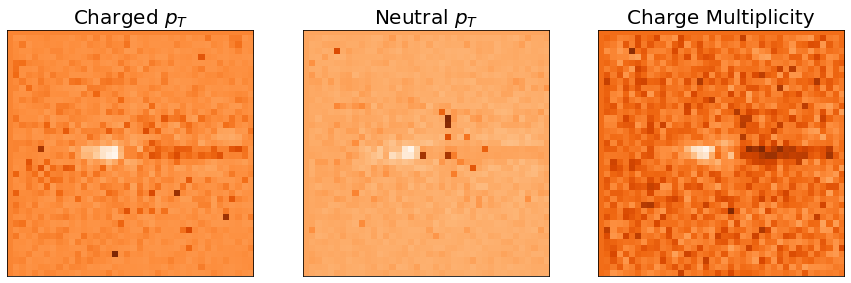

VH jet image:


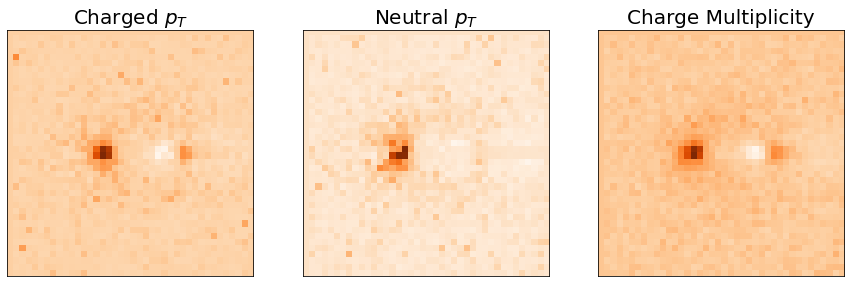

ttH jet image:


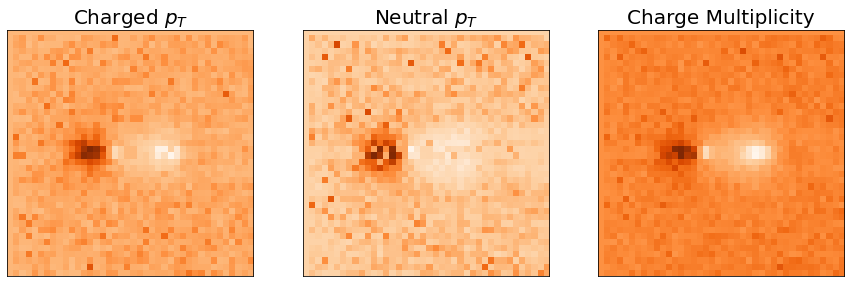

In [13]:
# Jet image
name_list = ["ggF","VBF","VH","ttH"]
figtitle = ["Charged $p_T$", "Neutral $p_T$", "Charge Multiplicity"]
for i, element in enumerate(name_list): 
    print( element + ' jet image:')
    plt.figure(figsize=(15,5))

    for j in range(1,4):
        plt.subplot(1,3,j)
        plt.imshow(JET[i][j-1],cmap="Oranges")
        plt.tick_params(labelbottom=False,labelleft=False,bottom=0,left=0)
        plt.title(figtitle[j-1],fontsize=20)
#         cb = plt.colorbar()
        # cb.ax.tick_params(labelsize=10)
    plt.savefig("./Higgs_Pt/jet_image_"+str(name_list[i])+"_400600.pdf", transparent=True)
    plt.show()   

# $P^H_T$  $>$ 1000 GeV

In [14]:
ggh_path = my_images[ (my_images["Y"]==0) & (my_images["PTH"] >= 1000)]
vbf_path = my_images[ (my_images["Y"]==1) & (my_images["PTH"] >= 1000)]
vh_path = my_images[ (my_images["Y"]==2) & (my_images["PTH"] >= 1000)]
tth_path = my_images[ (my_images["Y"]==3) & (my_images["PTH"] >= 1000)]

production_path = [ggh_path,vbf_path,vh_path,tth_path]
EVENT, JET = [], []
print(min(len(ggh_path),len(vbf_path),len(vh_path),len(tth_path)))


N = 4000
for i , element in enumerate(production_path): 
    event_filepaths = element["EventImageTest"]
    jet_filepaths = element["JetImageTest"]
    eventimage, jetimage = np.zeros((3,40,40)), np.zeros((3,40,40))
    k = 1
    for j , subelement in enumerate(event_filepaths):
        if k <= N:
            eventimage += np.load("./2CNN_Model_for_test/" + subelement)['arr_0']
            k += 1
        else:
            break
    k = 1 
    for j , subelement in enumerate(jet_filepaths):
        if k <= N:
            jetimage += np.load("./2CNN_Model_for_test/" + subelement)['arr_0']
            k += 1
        else:
            break
    eventimage = eventimage/N
    jetimage = jetimage/N
    EVENT.append(eventimage)
    JET.append(jetimage)
    

66404


ggF event image:


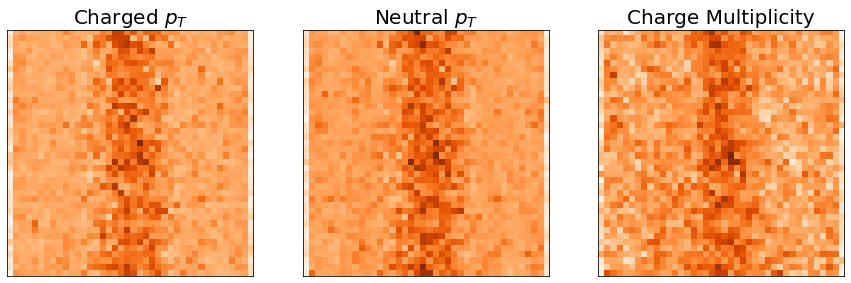

VBF event image:


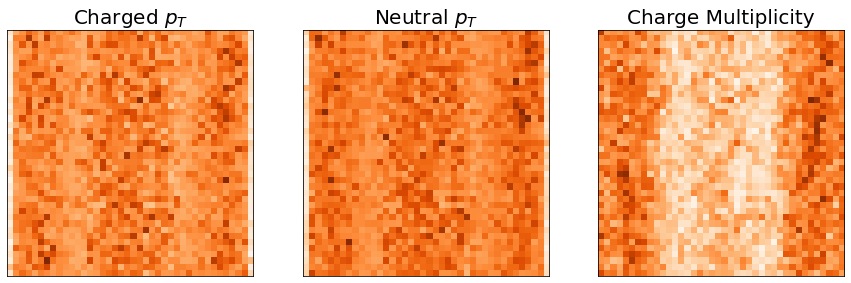

VH event image:


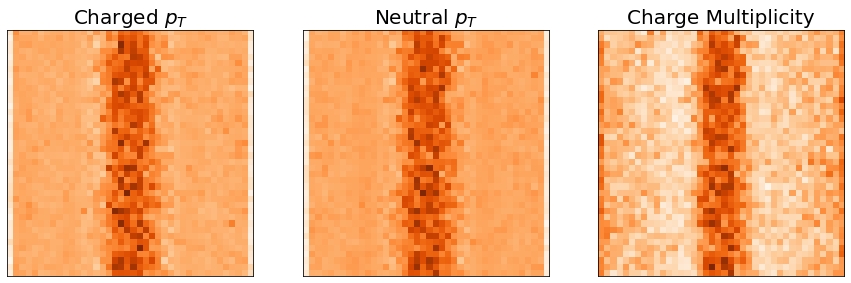

ttH event image:


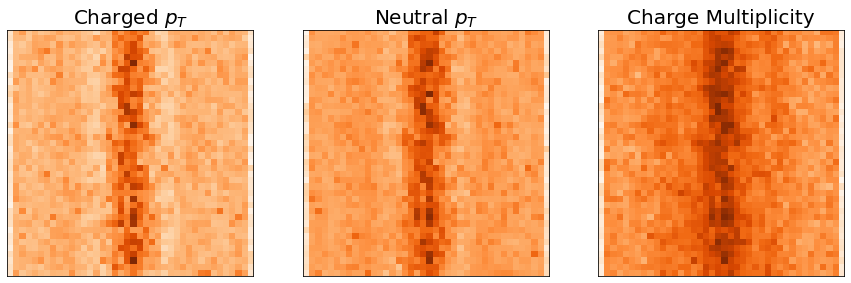

In [15]:
# Event image
name_list = ["ggF","VBF","VH","ttH"]
figtitle = ["Charged $p_T$", "Neutral $p_T$", "Charge Multiplicity"]
for i, element in enumerate(name_list): 
    print( element + ' event image:')
    fig, ax = plt.subplots(1,1, figsize=(15,5))

    for j in range(1,4):
        plt.subplot(1,3,j)
        plt.imshow(EVENT[i][j-1],cmap="Oranges")
        plt.tick_params(labelbottom=False,labelleft=False,bottom=0,left=0) 
        plt.title(figtitle[j-1],fontsize=20)
#         cb = plt.colorbar()
#         cb.ax.tick_params(labelsize=10)
    plt.savefig("./Higgs_Pt/event_image_"+str(name_list[i])+"_1000.pdf", transparent=True)
    plt.show()

ggF jet image:


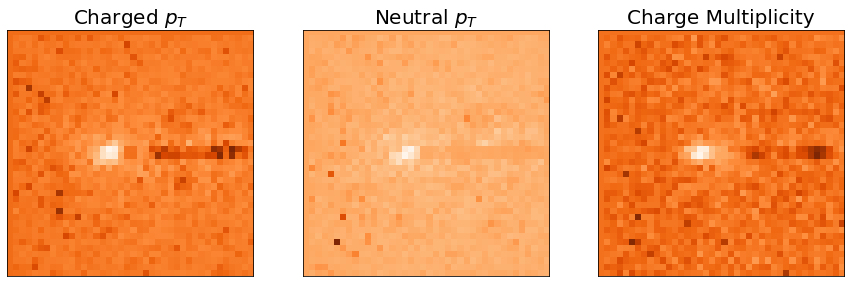

VBF jet image:


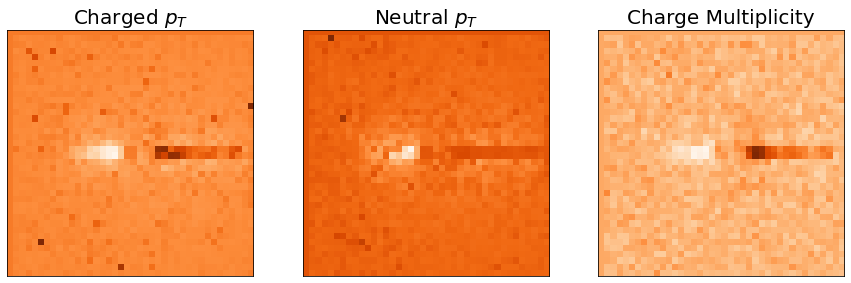

VH jet image:


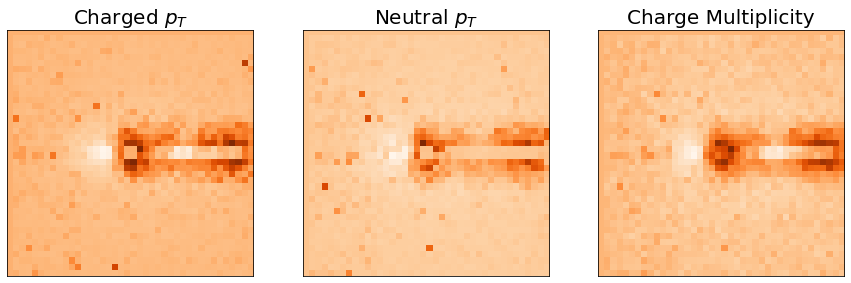

ttH jet image:


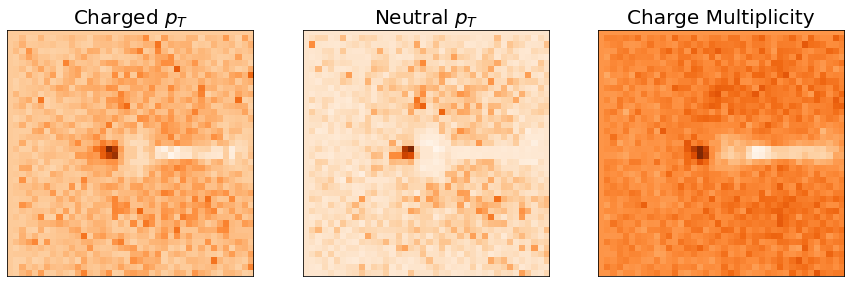

In [16]:
# Jet image
name_list = ["ggF","VBF","VH","ttH"]
figtitle = ["Charged $p_T$", "Neutral $p_T$", "Charge Multiplicity"]
for i, element in enumerate(name_list): 
    print( element + ' jet image:')
    plt.figure(figsize=(15,5))

    for j in range(1,4):
        plt.subplot(1,3,j)
        plt.imshow(JET[i][j-1],cmap="Oranges")
        plt.tick_params(labelbottom=False,labelleft=False,bottom=0,left=0) 
        plt.title(figtitle[j-1],fontsize=20)
#         cb = plt.colorbar()
        # cb.ax.tick_params(labelsize=10)
    plt.savefig("./Higgs_Pt/jet_image_"+str(name_list[i])+"_1000.pdf", transparent=True)
    plt.show() 